# Логистическая регрессия

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display
from sklearn.datasets import load_iris

from sklearn.pipeline import make_pipeline, Pipeline

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import RobustScaler, Normalizer

from sklearn.model_selection import train_test_split, cross_val_score  
from sklearn.model_selection import GridSearchCV, KFold, StratifiedShuffleSplit

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report

import sklearn
print(sklearn.__version__)


1.7.1


# Линейная модель

Линейные модели являются одними из самых простых и интуитивно монятных моделей машинного обучения. 

Напомним основы о которых мы с Вами говорили на 1 занятии.

У нас есть множество объектов (признаков) $X$, и каждому из них мы хотим сопоставить какое-то значение $y$. 

К примеру, у нас есть набор операций по банковской карте, а мы хотели бы, понять, какие из этих операций являются мошенническими. Если вы разделите все операции на два класса и нулём обозначите законные действия, а единицей мошеннические, то у вас получится простейшая задача классификации. 

Представьте другую ситуацию: у вас есть данные о годе выпуска, технических характеристиках и марках автомобилей, по которым мы хотели бы оценить стоимость этих автомобилей на вторичном рынке. Это пример задачи регрессии.

Таким образом, задачи классификации и регрессии можно сформулировать как поиск отображения из множества объектов $X$ в множество возможных $y$.

Математически задачи можно описать так:
- для  классификации $X\rightarrow \{0,1,..., k\}$ где $0,...,k$ - номера классов;
- для регрессии $X\rightarrow \mathbb{R}$, где $\mathbb{R}$ - вещественное число.


![ris01](https://yastatic.net/s3/ml-handbook/admin/1_1_02255c591c.png)

## Логистическая регрессия

Основная идея логистической регрессии заключается в том, что пространство исходных значений может быть разделено линейной границей (т.е. прямой) на две соответствующих классам области.

В чем линейность границы? В случае одного измерения - это точка, для двух - это прямая, для трех плоскость и т.д.



Рассмотрим точку $(a,b)$. Подставляя значения $x_1$ и $x_2$ в граничную функцию, получим результат $w_1 x_1+ w_2x_2+w_0$. Теперь, в зависимости от положения  $(a,b)$ следует рассмотреть три варианта:
- $(a,b)$ лежит в области, ограниченной точками класса 1. Тогда $w_1 x_1+ w_2x_2+w_0 > 0$, будет положительной и пусть принимает значение +1 . С математической точки зрения, чем больше величина этого значения, тем больше расстояние между точкой и границей, пусть это означает большую вероятность того, что $(a,b)$ принадлежит классу классу 1. Следовательно, вероятность нахождения точки $(a,b)$ в данной области будет находиться в пределах $(0.5, 1]$.
- $(a,b)$ лежит в области, ограниченной точками класса класса 0. Теперь, $w_1 x_1+ w_2x_2+w_0 < 0$ будет отрицательной и принимать занчение -1. Но, как и в случае с положительным значением, чем больше величина выходного значения по модулю, тем больше вероятность, что точка $(a,b)$ принадлежит классу 0, и она находится в интервале $[0, 0.5)$.
- $(a,b)$ лежит на самой границе. В этом случае, $w_1 x_1+ w_2x_2+w_0 = 0$. Это означает, что модель действительно не может определить, принадлежит ли $(a,b)$ к классу 1 или к классу 0. И в результате вероятность будет равняться 0.5.


### Линейная функция

Напомним как выглядит линейная функция в n-мерном пространстве признаков (для i-ой строки наших данных):

$$ f_w(x_i) = w_1 x_1 + ... + w_n x_n + w_0, $$
 
где $f_w(x_i)$ – целевая переменная (target или $y_i$), $x_i = (x_{i,1},...,x_{i,n})$ – вектор, соответствующий объекту выборки (вектор признаков, мы их также называем фичами от английского features), а $w_1, ... ,w_n, w_0$  – параметры модели. Признаки ещё называют фичами (от английского features). 

Вектор $w = (w_1,...,w_n)$ часто называю (особенно в эконометрике) вектором весов, а число $w_0$
 – свободным коэффициентом, или сдвигом (bias). 
 
 Более компактно линейную модель можно записать в виде:
 
 $$ f_w(x_i) = \langle x_i,w \rangle + w_0 = x_i^T w + w_0  $$
 
 
 $$ \left(x_{i,1} ... x_{i,n}\right)\left( \begin{array}{c} w_{1}\\... \\ w_{n} \end{array}\right)+w_0 = 
 \left(1, x_{i,1} ... x_{i,n}\right)\left( \begin{array}{c} w_0\\ w_1\\... \\ w_n \end{array}\right)
 $$
 
Поскольку это сильно упрощает запись, в дальнейшем мы будем считать, что это уже сделано и зависимость имеет вид просто $f_w(x_i)=⟨w,x_i⟩$.
 
### Обобщим результат

Обратите внимание, что по осям расположены признаки, а целью является спрогнозировать принадлежность точек к классам $\{0,1\}$, при этом классы мы будем соотносить со значениями $\{-1, +1\}$. Фактически мы будем назначать -1 если точка будет находится ниже линейной разделительной функции и +1 если выше, при этом на задачу классификации мы будем смотреть с точки зрения предсказания вероятности соотнесения точки к классу.
 
Проблема состоит в том, что вероятность, по определению, величина от 0 до 1, а простого способа обучить линейную модель так, чтобы это ограничение соблюдалось, нет. 

Из этой ситуации можно выйти так: научить линейную модель правильно предсказывать какой-то объект, связанный с вероятностью, но с диапазоном значений $(-\infty, +\infty)$, и преобразовать ответы модели в вероятность. 

Искомой функцией является функция логит (logit) – логарифм отношения вероятности положительного события к отрицательному $\log\left(\frac{p}{1−p}\right)$

![ris02](http://www.machinelearning.ru/wiki/images/5/57/Logit.png)

Если ответом нашей модели является $\log\left(\frac{p}{1−p}\right)$, то искомую вероятность посчитать не трудно:
$$ \langle w, x_i\rangle = \log\left(\frac{p}{1−p}\right)$$
$$e^{\langle w, x_i \rangle} = \frac{p}{1−p}$$
$$p = \frac{1}{1+e^{-\langle w, x_i \rangle}}$$

Функция в правой части называется сигмоидой и обозначается:
$$\sigma(z) = \frac{1}{1+e^{-z}}$$
Таким образом, $p = \sigma \left(\langle w,x_i\rangle \right)$

Функцию потерь для логистической регрессии в бинарном варианте можно записать в  компактном виде:

$$ L (w,X,y) = -\sum_{i=1}^N \Big(  y_i \log(p_i) + (1 - y_i) \log(1-p_i)\Big)$$

Доказательство [данного момента можно посмотреть тут ...](https://github.com/esokolov/ml-course-hse/blob/master/2020-fall/lecture-notes/lecture05-linclass.pdf)

Для [многоклассовой класификации тут ...](https://github.com/esokolov/ml-course-hse/blob/master/2020-fall/lecture-notes/lecture06-linclass.pdf)
и тут используется для функция SoftMax для нормировки результата:
$$ SoftMax(z_1,...z_k) = \left( \dfrac{\exp(z_1)}{\sum_{j=1}^{k} \exp(z_k)}, ... , \dfrac{\exp(z_k)}{\sum_{j=1}^{k} \exp(z_k)} \right)$$
где $z_j = \langle w_j, x_i\rangle$, а $w$ подбираются для каждого класса по отдельности против всех остальных.


### Итог

Предсказание модели будет вычисляться, следующим образом:
$$p =\sigma\left(\langle w,x_i\rangle\right)$$

Это вероятность положительного класса, а как от неё перейти к предсказанию самого класса? 

Все наши предсказания положительные и находятся в диапазоне от 0 до 1. Что же делать? Интуитивным и не совсем (и даже совсем не) правильным является ответ «взять порог 0.5». 

Более корректным будет подобрать этот порог отдельно, для уже построенной регрессии минимизируя нужную вам метрику на отложенной валидационной выборке в процессе кросс-валидации выборке. Например, сделать так, чтобы доли предсказанных  классов примерно совпадала с реальной.

Отдельно заметим, что метод называется **логистической регрессией**, а не **логистической классификацией** именно потому, что предсказываем мы не классы, а вещественные числа – логиты (фактически вероятности).


![ris3](https://ds100.org/course-notes-su23/logistic_regression_2/logistic_reg_2_files/figure-html/cell-8-output-1.png)

Вопрос - а почему 0 это TP?

## Проблема мультиколлениарности

Решаем систему линейных уравнений, при условии размерности $n\times m$ матрицы $X$:

$$ y = X w \Rightarrow  X^T y = X^T X w \Rightarrow  (X^TX)^{-1} X^T y = (X^TX)^{-1}(X^T X) w \Rightarrow (X^TX)^{-1} X^T y = w$$

и тут явная проблема, если в $X$ есть линейно зависимые строки, то обратная матрица несуществует из-за $Det(X^TX) = 0$, и при наличии "сильной" мультиколинеарности $w\rightarrow \infty$

тогда попытка решить задачу минимизации расхождения истинных и предсказанных значений становится проблематичной.

**Борьба с мультиколинеарноcтью - штрафы**

Самый простой способ добавить диагональную матрицу ("гребень")
$$w = (X^TX +\lambda I)^{-1} X^T y$$ 

Это так называемая $L_2$ - регуляризация.

Более сложная с математической точки $L_1$ и эластичная-регуляризация. 

Попробуем объяснить как это работает без значительного математического объяснения. Упростим считая, что нам известны истинные вероятности $y$. Тогда функция потерь минимизируется путем подбора $w$:

$$L(w,X,y) = \sum_{i=1}^n (y_i -\hat y_i) = \sum_{i=1}^n (y_i - X w) \rightarrow \min$$

Введем регуляризацию:
1. Lasso или $L_1$ или лассо
   $$ L(w,X,y)  = \sum_{i=1}^n (y_i - X w) + \lambda ||w|| $$
2. Ridge или $L_1$ или ридж или гребневая
    $$ L(w,X,y)  = \sum_{i=1}^n (y_i - X w) + \lambda w^2 $$
3. ElasticNet  или эластичная
   $$ L(w,X,y)  = \sum_{i=1}^n (y_i - X w) + \lambda_1 ||w|| + \lambda_2 w^2 $$


![ris05](pict/Lasso-Ridge-EN.png)

Что тут нарисовано? Здесь мы пытаемся минимизировать функцию потерь по двум фичас (признакам) $w_1$ и $w_2$ (на рисунке $\beta_1$ и $\beta_2$, рисунок цельнотянутый из интернетов, а перерисовывать было лень :). 

Это могут быть коэффициенты обычной линейной регрессии $y = w_2 x + w_1$.  По сути мы ищем такую точку на плоскости с координатами  $w_1$ и $w_2$, чтоб она соответствовала минимальной ошибке. И если бы у нас не было регуляризации, то нужно взять $w_1$ и $w_2$, такие, чтобы они давали нам $\hat y$ (на рисунке $\hat\beta$ )и все ок!

Но регуляризация требут физически ограничить значения  $w_1$ и $w_2$. Для каждого типа это залитые фигуры, при этом чем меньше $\lambda$, тем больше "радиус фигуры", при $\lambda = 0$ регуляризация отсутствует. Исходя из этого запишем:
1. $L_1$:  $|w_1|+|w_2|\le t$
2. $L_2$:  $w_1^2+ w_2^2 \le r$
3. ElasticNet:  $ w_1^2+ w_2^2 + |w_1|+|w_2| \le p$

Это требование выполняется только на границе и внутри соответствующей фигуры. Как же тогда быть? Наша функция потерь квадратичная - это параболоид (не путать с [гиперболоидом инженера Гарина ...](https://ru.wikipedia.org/wiki/Гиперболоид_инженера_Гарина_(фильм))), а тут мы смотрим на него "сферху" и по линиям уровня одинакового значения  $\hat y$ поднимаемся из Марианской впадины до касания с фигурой. И вот тут появляются интересные следствия этого касания ($L_1$ может занулить признак).

# Обработаем датасет ириски для примера применения логистической реграссии

In [41]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

X, y = load_iris(return_X_y=True)

clf = LogisticRegression(random_state=42, penalty=None).fit(X, y)

clf.predict(X)
clf.score(X, y)

0.9866666666666667

### Параметры модели `penalty` и `C`

`penalty`:
- `penalty = None` штрафа нет
- `penalty = 'l1'` удаляет признаки практически не влияющие на ответ (количество признаков уменьшается)
- `penalty = 'l2'` штрафует признаки практически не влияющие на ответ (количество признаков не меняется)
- `penalty = 'elastic'` одновременное применение `'l1'` и `'l2'`

**Внимание!** по умолчанию стоит опция `penalty='l2'`

Еще один важный параметр  - сила регуляризации `C` по умолчанию 1. Больше 1 регуляризация сильнее, меньше 1 слабее, равна 0 - отсутствует(аналогично `None`)

In [42]:
X, y = load_iris(return_X_y=True)

clf = LogisticRegression(random_state=42, penalty=None).fit(X, y)

clf.predict(X)
clf.score(X, y)

0.9866666666666667

In [43]:
clf = LogisticRegression(random_state=42, penalty='l2').fit(X, y)

clf.predict(X)
clf.score(X, y)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9733333333333334

In [44]:
clf = LogisticRegression(random_state=42, penalty='l2', max_iter=500).fit(X, y)

clf.predict(X)
clf.score(X, y)

0.9733333333333334

In [45]:
clf = make_pipeline(StandardScaler(),LogisticRegression(random_state=42, penalty='l2'))
clf = clf.fit(X, y)

clf.predict(X)
clf.score(X, y)

0.9733333333333334

In [46]:
clf = make_pipeline(StandardScaler(),LogisticRegression(random_state=42, solver='liblinear', penalty='l1'))
clf = clf.fit(X, y)

clf.predict(X)
clf.score(X, y)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1296: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wrap the estimator in a OneVsRestClassifier to keep applying a one-versus-rest scheme.
  warnings.warn(


0.94

**Внимание!** Для решения оптимизационной задачи используются разные оптимизаторы, для нахождения оптимальной разделительной гиперплоскости, обратите внимание на комбинации `solver` и `penalty` https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

## Построим модель

In [71]:
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [96]:
pipe = Pipeline([('preprocessing', MinMaxScaler()), 
                 ('clf',           LogisticRegression())])

cv = StratifiedShuffleSplit(test_size = .3, train_size = .6, n_splits = 10
                            , random_state = 42)
scaling = [ MinMaxScaler(), StandardScaler(),RobustScaler(), Normalizer()]

param_grid =[
    {'preprocessing': scaling,
     'clf__penalty': ['l2'], 
     'clf__solver': ['newton-cg' ,'lbfgs', 'sag', 'saga']},
    {'preprocessing': scaling,
     'clf__penalty': ['l1'], 
     'clf__solver': ['saga'],
     'clf__max_iter': [1000]},
    {'preprocessing': scaling,
     'clf__penalty': [None], 
     'clf__solver': ['lbfgs','newton-cg']}
    ]

grid = GridSearchCV(pipe, param_grid, cv = cv, return_train_score = True)
grid.fit(X_train, y_train)
grid    

,estimator,Pipeline(step...egression())])
,param_grid,"[{'clf__penalty': ['l2'], 'clf__solver': ['newton-cg', 'lbfgs', ...], 'preprocessing': [MinMaxScaler(), StandardScaler(), ...]}, {'clf__max_iter': [1000], 'clf__penalty': ['l1'], 'clf__solver': ['saga'], 'preprocessing': [MinMaxScaler(), StandardScaler(), ...]}, ...]"
,scoring,None
,n_jobs,None
,refit,True
,cv,StratifiedShu...rain_size=0.6)
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,True
,copy,True


In [97]:
grid_result = pd.DataFrame(grid.cv_results_).sort_values(["rank_test_score",'std_test_score']).T
grid_result

,17,27,1,5,9,13,23,16,18,22,...,26,0,4,8,12,19,3,7,11,15
mean_fit_time,0.005239,0.006396,0.003695,0.003113,0.001638,0.001854,0.004575,0.003886,0.005746,0.0043,...,0.006842,0.00349,0.003128,0.001584,0.001569,0.002262,0.002839,0.003375,0.001621,0.001582
std_fit_time,0.001836,0.001181,0.000203,0.00009,0.000058,0.000093,0.001013,0.000669,0.000975,0.000248,...,0.001064,0.000266,0.000164,0.000099,0.000063,0.00005,0.000088,0.000159,0.000089,0.000092
mean_score_time,0.000672,0.000826,0.000709,0.000646,0.000604,0.00062,0.000836,0.000639,0.000677,0.000659,...,0.000666,0.00071,0.000652,0.0006,0.00059,0.000772,0.000794,0.000809,0.000745,0.000749
std_score_time,0.00005,0.000032,0.000056,0.000047,0.000025,0.000035,0.000078,0.000039,0.000046,0.000031,...,0.000015,0.000058,0.000036,0.000031,0.000018,0.000047,0.000034,0.000044,0.000034,0.000041
param_clf__penalty,l1,None,l2,l2,l2,l2,None,l1,l1,None,...,None,l2,l2,l2,l2,l1,l2,l2,l2,l2
param_clf__solver,saga,newton-cg,newton-cg,lbfgs,sag,saga,lbfgs,saga,saga,lbfgs,...,newton-cg,newton-cg,lbfgs,sag,saga,saga,newton-cg,lbfgs,sag,saga
param_preprocessing,StandardScaler(),Normalizer(),StandardScaler(),StandardScaler(),StandardScaler(),StandardScaler(),Normalizer(),MinMaxScaler(),RobustScaler(),RobustScaler(),...,RobustScaler(),MinMaxScaler(),MinMaxScaler(),MinMaxScaler(),MinMaxScaler(),Normalizer(),Normalizer(),Normalizer(),Normalizer(),Normalizer()
param_clf__max_iter,1000.0,NaN,NaN,NaN,NaN,NaN,NaN,1000.0,1000.0,NaN,...,NaN,NaN,NaN,NaN,NaN,1000.0,NaN,NaN,NaN,NaN
params,"{'clf__max_iter': 1000, 'clf__penalty': 'l1', ...","{'clf__penalty': None, 'clf__solver': 'newton-...","{'clf__penalty': 'l2', 'clf__solver': 'newton-...","{'clf__penalty': 'l2', 'clf__solver': 'lbfgs',...","{'clf__penalty': 'l2', 'clf__solver': 'sag', '...","{'clf__penalty': 'l2', 'clf__solver': 'saga', ...","{'clf__penalty': None, 'clf__solver': 'lbfgs',...","{'clf__max_iter': 1000, 'clf__penalty': 'l1', ...","{'clf__max_iter': 1000, 'clf__penalty': 'l1', ...","{'clf__penalty': None, 'clf__solver': 'lbfgs',...",...,"{'clf__penalty': None, 'clf__solver': 'newton-...","{'clf__penalty': 'l2', 'clf__solver': 'newton-...","{'clf__penalty': 'l2', 'clf__solver': 'lbfgs',...","{'clf__penalty': 'l2', 'clf__solver': 'sag', '...","{'clf__penalty': 'l2', 'clf__solver': 'saga', ...","{'clf__max_iter': 1000, 'clf__penalty': 'l1', ...","{'clf__penalty': 'l2', 'clf__solver': 'newton-...","{'clf__penalty': 'l2', 'clf__solver': 'lbfgs',...","{'clf__penalty': 'l2', 'clf__solver': 'sag', '...","{'clf__penalty': 'l2', 'clf__solver': 'saga', ..."
split0_test_score,0.941176,1.0,0.970588,0.970588,0.970588,0.970588,1.0,0.941176,0.941176,1.0,...,1.0,0.852941,0.852941,0.852941,0.852941,0.882353,0.705882,0.705882,0.705882,0.705882


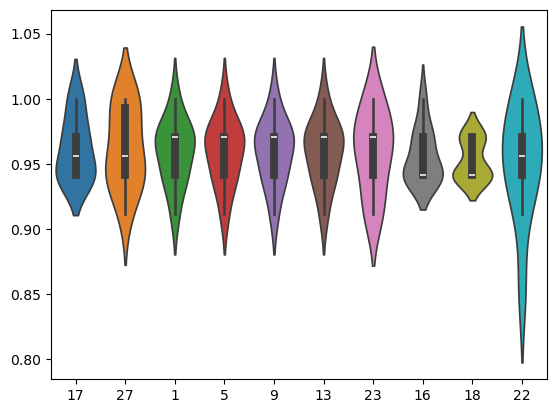

In [98]:
mask = grid_result.index[grid_result.index.str.endswith("_test_score")][:-3]
grid_result.columns = grid_result.columns.values.astype(str)
tabl = grid_result.loc[mask].iloc[:,:10]
sns.violinplot(data=tabl);

In [75]:
mask

Index(['split0_test_score', 'split1_test_score', 'split2_test_score',
       'split3_test_score', 'split4_test_score', 'split5_test_score',
       'split6_test_score', 'split7_test_score', 'split8_test_score',
       'split9_test_score'],
      dtype='object')

In [99]:
grid.cv_results_['params'][17]

{'clf__max_iter': 1000,
 'clf__penalty': 'l1',
 'clf__solver': 'saga',
 'preprocessing': StandardScaler()}

In [100]:
grid.cv_results_['params'][1]

{'clf__penalty': 'l2',
 'clf__solver': 'newton-cg',
 'preprocessing': StandardScaler()}

In [101]:
pipe_best = make_pipeline(StandardScaler(), LogisticRegression(solver = 'saga', penalty = 'l1', max_iter=1000) )
pipe_1 = make_pipeline(StandardScaler(), LogisticRegression(solver = 'newton-cg', penalty = 'l2') )

pipe_best.fit(X_train,y_train)
pipe_1.fit(X_train,y_train)

,steps,"[('standardscaler', ...), ('logisticregression', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0


In [102]:
y_pred_best = pipe_best.predict(X_test)
y_pred_1 = pipe_1.predict(X_test)

In [103]:
print('Первая модель')
print(classification_report(y_test, y_pred_best))

print('Третья модель')
print(classification_report(y_test, y_pred_1))

Первая модель
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38

Третья модель
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(solver='newton-cg'))])


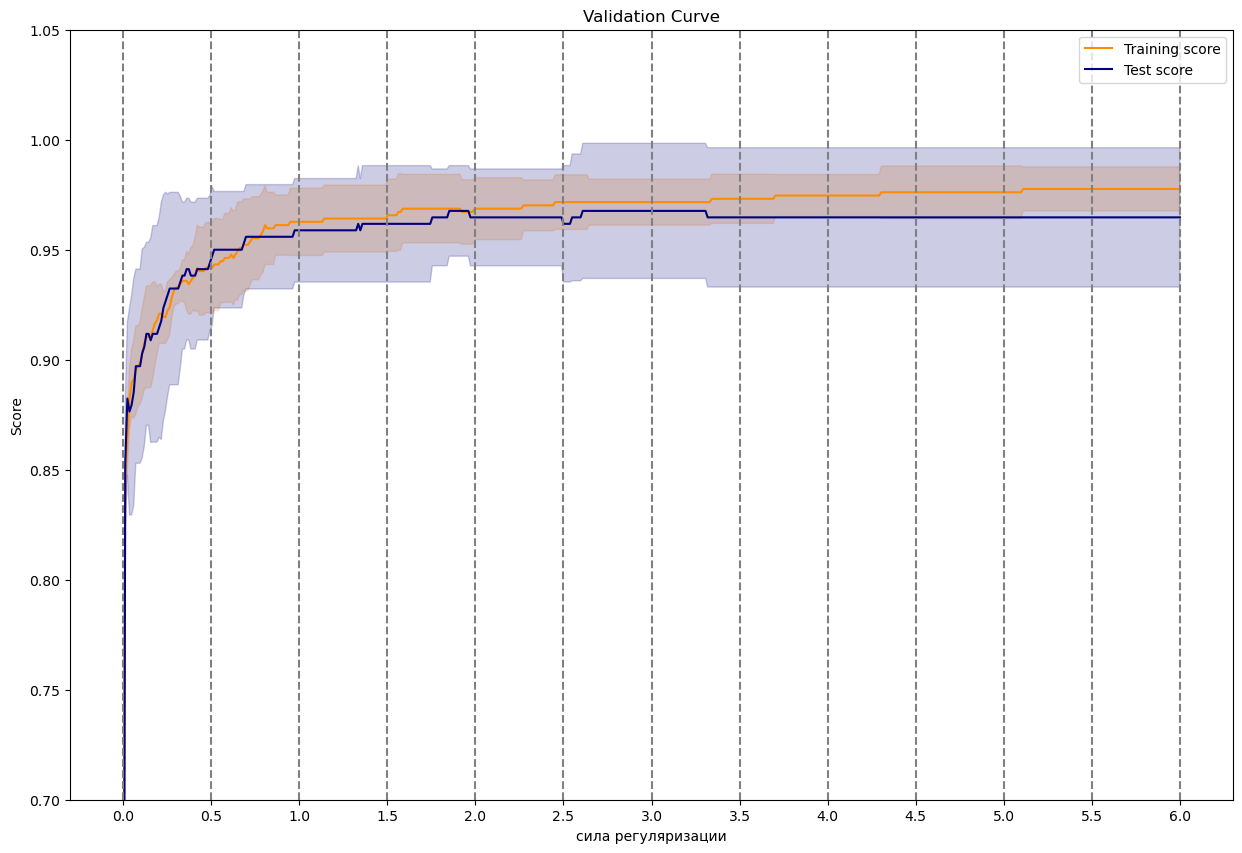

In [104]:
pipe_fin = make_pipeline( StandardScaler(), LogisticRegression(solver = 'newton-cg', penalty = 'l2'))
print(pipe_fin)

from sklearn.model_selection import validation_curve

n_range = np.linspace(0.0001, 6, 500)
train_scores, test_scores = validation_curve(
    pipe_fin , X_train, y_train,
    param_name = "logisticregression__C", 
    param_range = n_range,
    cv = cv, 
    scoring="accuracy", 
    n_jobs=-1)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(15,10))

plt.title("Validation Curve")
plt.xlabel("сила регуляризации")
plt.ylabel("Score")
plt.ylim(0.7, 1.05)

plt.plot(n_range, train_scores_mean, label="Training score", color="darkorange")
plt.fill_between(n_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange")
plt.plot(n_range, test_scores_mean, label="Test score",
             color="navy")
plt.fill_between(n_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy")

plt.xticks(np.linspace(0, 6, 13))
for i in np.arange(0,6.5,0.5):
    plt.vlines(i, 0.7,1.05, linestyles='dashed', colors='gray')

plt.legend(loc="best")
plt.show();

In [105]:
pipe_end = make_pipeline( StandardScaler(), 
                         LogisticRegression(solver = 'newton-cg', penalty = 'l2', C = 3))
pipe_end.fit(X_train,y_train)
y_pred_end = pipe_end.predict(X_test)
print(classification_report(y_test, y_pred_end))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



# 